In [75]:
#import pd etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats
import seaborn as sns
import scipy.stats as st

pd.set_option('display.max_rows', 800)

pd.set_option('display.max_columns', None)

In [76]:
Factbook_df = pd.read_csv('../Resources/Factbookdata.csv')
Happy_df = pd.read_csv('../Resources/cleanAndHappy.csv', index_col = 0)


Factbook_df.head()
Happy_df['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [77]:
Factbook_df.head()

,Country,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
0,world,86.2,12.0,43.0,83.0,NaN,17500.0,27.9,7.7,NaN,91.1,67.7,NaN,NaN,NaN,1.01,69.8,2.42,52.5,30.6,NaN,NaN,NaN,NaN,356000.0,NaN,NaN,NaN,840.0
1,afghanistan,38.2,10.0,10.6,84.1,presidential Islamic republic,2000.0,22.7,23.9,54.5,55.3,31.9,5.5,25.0,-0.6,1.03,52.1,5.02,88.8,19.0,33.0,65.0,N,E,0.0,5987.0,0.000000,2.07,1884.0
2,akrotiri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,32.0,N,E,56.3,48.0,0.539789,NaN,NaN
3,albania,97.6,15.0,66.4,100.0,parliamentary republic,12500.0,15.9,13.8,14.3,83.6,93.2,21.7,1.5,-3.3,0.98,78.6,1.52,44.0,33.4,41.0,20.0,N,E,362.0,691.0,0.343780,28.12,708.0
4,algeria,80.2,14.0,42.9,99.4,presidential republic,15200.0,37.8,11.7,23.0,83.6,87.6,27.4,3.0,-0.9,1.03,77.2,2.66,52.7,28.3,28.0,3.0,N,E,998.0,6734.0,0.129074,0.80,800.0


In [78]:

Factbook_df['Country'] = Factbook_df['Country'].str.replace("_"," ")

In [79]:
Factbook_df.head(15)

,Country,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
0,world,86.2,12.0,43.0,83.0,NaN,17500.0,27.9,7.7,NaN,91.1,67.7,NaN,NaN,NaN,1.01,69.8,2.42,52.5,30.6,NaN,NaN,NaN,NaN,356000.0,NaN,NaN,NaN,840.0
1,afghanistan,38.2,10.0,10.6,84.1,presidential Islamic republic,2000.0,22.7,23.9,54.5,55.3,31.9,5.5,25.0,-0.6,1.03,52.1,5.02,88.8,19.0,33.0,65.0,N,E,0.0,5987.0,0.000000,2.07,1884.0
2,akrotiri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,32.0,N,E,56.3,48.0,0.539789,NaN,NaN
3,albania,97.6,15.0,66.4,100.0,parliamentary republic,12500.0,15.9,13.8,14.3,83.6,93.2,21.7,1.5,-3.3,0.98,78.6,1.52,44.0,33.4,41.0,20.0,N,E,362.0,691.0,0.343780,28.12,708.0
4,algeria,80.2,14.0,42.9,99.4,presidential republic,15200.0,37.8,11.7,23.0,83.6,87.6,27.4,3.0,-0.9,1.03,77.2,2.66,52.7,28.3,28.0,3.0,N,E,998.0,6734.0,0.129074,0.80,800.0
5,american samoa,NaN,NaN,31.3,59.0,presidential democracy; a self-governing terri...,11200.0,NaN,29.8,NaN,100.0,62.5,NaN,NaN,-26.6,1.00,73.9,2.57,NaN,26.1,14.0,170.0,S,W,116.0,0.0,1.000000,78.10,NaN
6,andorra,100.0,NaN,97.9,100.0,parliamentary democracy (since March 1993) tha...,49900.0,NaN,3.7,NaN,100.0,100.0,25.6,NaN,0.0,1.06,82.9,1.41,NaN,44.9,42.0,1.0,N,E,0.0,118.0,0.000000,34.00,1996.0
7,angola,71.1,10.0,13.0,40.5,presidential republic,6800.0,28.6,6.6,36.6,49.0,51.6,8.2,19.0,0.1,0.95,60.6,6.09,97.6,15.9,12.0,18.0,S,E,1600.0,5369.0,0.229588,46.30,1112.0
8,anguilla,NaN,NaN,81.6,NaN,parliamentary democracy (House of Assembly); s...,12200.0,NaN,8.0,23.0,94.6,97.9,NaN,NaN,11.5,0.90,81.6,1.74,NaN,35.1,18.0,63.0,N,W,61.0,0.0,1.000000,61.10,NaN
9,antarctica,NaN,NaN,100.0,NaN,Antarctic Treaty Summary - the Antarctic regio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.0,S,E,17968.0,NaN,NaN,NaN,2300.0


In [80]:
Happy_df.Country = Happy_df.Country.str.lower()

In [81]:
Happy_df.head()

,Overall Rank,Country,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,1,switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [82]:
Happy_dfgb = Happy_df.groupby('Country')
Happydfgb =  Happy_dfgb.mean().reset_index(drop = False)
Happydfgb

,Country,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,afghanistan,148.250000,3.590250,0.358892,0.382941,0.228134,0.147405,0.295163,0.066367,2016.500000
1,albania,106.250000,4.711000,0.936541,0.731664,0.766120,0.369122,0.165358,0.047251,2016.500000
2,algeria,60.750000,5.781750,1.015704,1.052757,0.635071,0.201546,0.068274,0.154124,2016.500000
3,angola,140.000000,3.872250,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570,2016.500000
4,argentina,27.250000,6.552750,1.115794,1.305700,0.730869,0.484275,0.098964,0.067885,2016.500000
5,armenia,124.500000,4.351750,0.836417,0.849841,0.668564,0.199286,0.079242,0.032459,2016.500000
6,australia,9.750000,7.288250,1.400606,1.374258,0.884162,0.617054,0.437097,0.320716,2016.500000
7,austria,12.500000,7.116000,1.403927,1.336204,0.850600,0.588162,0.304501,0.211325,2016.500000
8,azerbaijan,83.250000,5.234500,1.081305,1.002938,0.582316,0.387931,0.052665,0.174194,2016.500000
9,bahrain,43.750000,6.092500,1.397603,1.212330,0.688813,0.514854,0.190190,0.235941,2016.500000


In [92]:
merge_df = pd.merge(Happydfgb,Factbook_df, on='Country', how='inner' ) 
merge_df.head(15)
merge_df = merge_df.sort_values("Overall Rank")
merge_df.head()


,Country,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
35,denmark,2.25,7.53250,1.400161,1.416360,0.832561,0.634449,0.335595,0.434218,2016.5,NaN,19.0,97.0,100.0,parliamentary constitutional monarchy,50100.0,28.8,5.7,13.4,100.0,99.6,19.7,NaN,4.3,0.99,81.0,1.78,56.0,41.9,56.0,10.0,N,E,7314.0,140.0,0.981218,12.9,34.0
100,norway,2.75,7.53775,1.527226,1.393343,0.834667,0.646811,0.343488,0.344688,2016.5,NaN,18.0,97.3,100.0,parliamentary constitutional monarchy,72100.0,34.3,4.2,NaN,100.0,98.1,23.1,NaN,5.3,1.02,82.0,1.85,52.1,39.3,62.0,10.0,N,E,25148.0,2566.0,0.907411,27.8,460.0
56,iceland,3.00,7.51525,1.388153,1.460016,0.890681,0.624793,0.435405,0.145682,2016.5,NaN,19.0,98.2,100.0,unitary parliamentary republic,52200.0,25.8,2.8,NaN,100.0,98.8,21.9,NaN,3.7,1.00,83.1,1.99,51.6,36.7,65.0,18.0,N,W,4970.0,0.0,1.000000,0.3,557.0
129,switzerland,3.00,7.51925,1.477205,1.390165,0.897398,0.632803,0.281040,0.388954,2016.5,NaN,16.0,89.4,100.0,federal republic (formally a confederation),62100.0,33.8,3.2,6.6,100.0,99.9,19.5,NaN,4.6,0.97,82.7,1.56,48.8,42.5,47.0,8.0,N,E,0.0,1770.0,0.000000,31.5,1350.0
43,finland,4.25,7.48000,1.361200,1.396287,0.845794,0.627920,0.233978,0.399843,2016.5,NaN,19.0,87.7,100.0,parliamentary republic,44500.0,23.3,8.5,NaN,100.0,97.6,22.2,NaN,2.8,0.97,81.1,1.75,57.9,42.6,64.0,26.0,N,E,1250.0,2563.0,0.327826,72.9,164.0


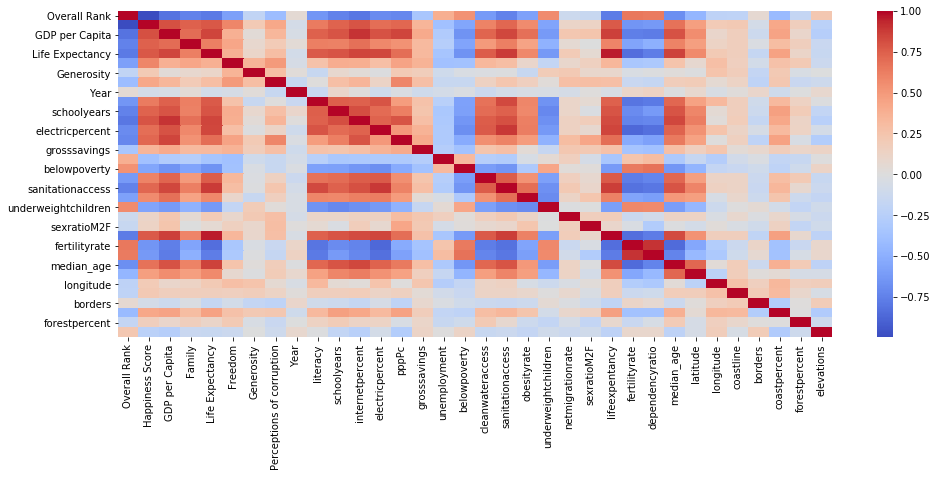

In [88]:
heat= merge_df.corr();
plt.figure(figsize=(16, 6))
sns.heatmap(heat, cmap='coolwarm')

In [90]:
merge_df.corr()

,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year,literacy,schoolyears,internetpercent,electricpercent,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,coastline,borders,coastpercent,forestpercent,elevations
Overall Rank,1.000000,-0.994763,-0.813526,-0.742063,-0.779715,-0.582079,-0.190623,-0.406647,0.055505,-0.638493,-0.738589,-0.794206,-0.695098,-0.718432,-0.339948,0.384861,0.537141,-0.617511,-0.738021,-0.577208,0.570692,-0.121654,-0.145437,-0.774161,0.655010,0.635454,-0.679801,-0.452962,-0.211084,-0.207065,0.071997,-0.422198,-0.174162,0.229663
Happiness Score,-0.994763,1.000000,0.811847,0.750154,0.778945,0.594662,0.208889,0.431051,-0.068723,0.634735,0.742583,0.794196,0.689411,0.721219,0.352050,-0.377535,-0.554440,0.609785,0.726088,0.565684,-0.565525,0.115211,0.134112,0.769295,-0.645540,-0.620806,0.677213,0.470699,0.199556,0.220313,-0.073247,0.423693,0.172372,-0.226332
GDP per Capita,-0.813526,0.811847,1.000000,0.699853,0.848227,0.377724,0.037971,0.342587,-0.048522,0.742905,0.795951,0.901000,0.801950,0.849572,0.413755,-0.290484,-0.652292,0.730023,0.840619,0.685090,-0.614681,0.234155,0.246430,0.861157,-0.760565,-0.771966,0.803965,0.556340,0.099805,0.172393,-0.114761,0.447512,0.101468,-0.260186
Family,-0.742063,0.750154,0.699853,1.000000,0.623614,0.436536,0.084865,0.201623,0.042260,0.619265,0.613644,0.681392,0.584200,0.539171,0.320423,-0.261105,-0.564084,0.498158,0.618982,0.450944,-0.475963,0.058285,-0.000956,0.599537,-0.562476,-0.495629,0.603999,0.470235,0.131157,0.170158,-0.027080,0.305707,0.173912,-0.142874
Life Expectancy,-0.779715,0.778945,0.848227,0.623614,1.000000,0.377160,0.109583,0.291000,-0.075983,0.766422,0.794323,0.845406,0.843307,0.693675,0.326852,-0.341171,-0.656860,0.765430,0.877730,0.583224,-0.624030,0.198744,0.063287,0.959921,-0.838517,-0.764111,0.854806,0.578575,0.212704,0.173011,-0.166508,0.459825,0.118393,-0.146338
Freedom,-0.582079,0.594662,0.377724,0.436536,0.377160,1.000000,0.360732,0.495669,-0.055228,0.263075,0.396166,0.385119,0.287345,0.451480,0.362053,-0.373697,-0.371257,0.335458,0.294830,0.099501,-0.182334,0.091320,0.151258,0.339510,-0.324854,-0.313767,0.256416,0.074313,0.284469,0.160077,-0.079221,0.274183,0.212729,-0.129664
Generosity,-0.190623,0.208889,0.037971,0.084865,0.109583,0.360732,1.000000,0.293046,0.028919,-0.152198,0.087972,0.034262,-0.008562,0.207834,0.177843,-0.103996,-0.029776,-0.016708,-0.011317,-0.146311,0.192146,0.219151,0.093914,0.095216,-0.030381,-0.012636,0.024410,-0.012104,0.257579,0.174793,-0.172705,0.214656,-0.043709,-0.003936
Perceptions of corruption,-0.406647,0.431051,0.342587,0.201623,0.291000,0.495669,0.293046,1.000000,-0.151431,0.011743,0.283507,0.350170,0.122325,0.591813,0.287590,-0.146679,-0.146509,0.143668,0.240827,0.164206,0.029289,0.289747,0.297351,0.288433,-0.141288,-0.166735,0.176741,0.192056,0.058660,0.131690,-0.201999,0.235269,-0.143187,-0.111046
Year,0.055505,-0.068723,-0.048522,0.042260,-0.075983,-0.055228,0.028919,-0.151431,1.000000,-0.144363,0.096466,0.015607,-0.101199,-0.028265,-0.099381,-0.070709,-0.027378,-0.128558,-0.071475,-0.043891,-0.038469,-0.067350,0.014269,-0.036964,0.110545,0.140816,-0.010126,0.084561,-0.038695,0.020203,0.103755,-0.103724,-0.002614,0.083743
literacy,-0.638493,0.634735,0.742905,0.619265,0.766422,0.263075,-0.152198,0.011743,-0.144363,1.000000,0.750680,0.744052,0.796157,0.479141,0.264892,-0.243042,-0.578799,0.678895,0.829424,0.593771,-0.657763,0.106894,0.062918,0.750561,-0.807129,-0.780569,0.722671,0.456002,0.322366,0.172832,-0.097946,0.327506,0.135108,-0.007845


In [101]:
newdf = merge_df[['Country','Overall Rank','Happiness Score','schoolyears','electricpercent','grosssavings','belowpoverty','sanitationaccess','sexratioM2F','fertilityrate','median_age','electricpercent']]
newdf.head(15)


,Country,Overall Rank,Happiness Score,schoolyears,electricpercent,grosssavings,belowpoverty,sanitationaccess,sexratioM2F,fertilityrate,median_age,electricpercent
35,denmark,2.25,7.53250,19.0,100.0,28.8,13.4,99.6,0.99,1.78,41.9,100.0
100,norway,2.75,7.53775,18.0,100.0,34.3,NaN,98.1,1.02,1.85,39.3,100.0
56,iceland,3.00,7.51525,19.0,100.0,25.8,NaN,98.8,1.00,1.99,36.7,100.0
129,switzerland,3.00,7.51925,16.0,100.0,33.8,6.6,99.9,0.97,1.56,42.5,100.0
43,finland,4.25,7.48000,19.0,100.0,23.3,NaN,97.6,0.97,1.75,42.6,100.0
25,canada,6.25,7.36875,16.0,100.0,20.8,9.4,99.8,0.98,1.60,42.4,100.0
95,netherlands,6.50,7.38375,18.0,100.0,31.2,8.8,97.7,0.98,1.78,42.7,100.0
96,new zealand,8.25,7.31450,19.0,100.0,21.0,NaN,NaN,0.99,2.01,38.1,100.0
128,sweden,9.00,7.31325,19.0,100.0,28.9,15.0,99.3,1.00,1.87,41.1,100.0
6,australia,9.75,7.28825,23.0,100.0,21.0,NaN,100.0,1.01,1.77,38.8,100.0


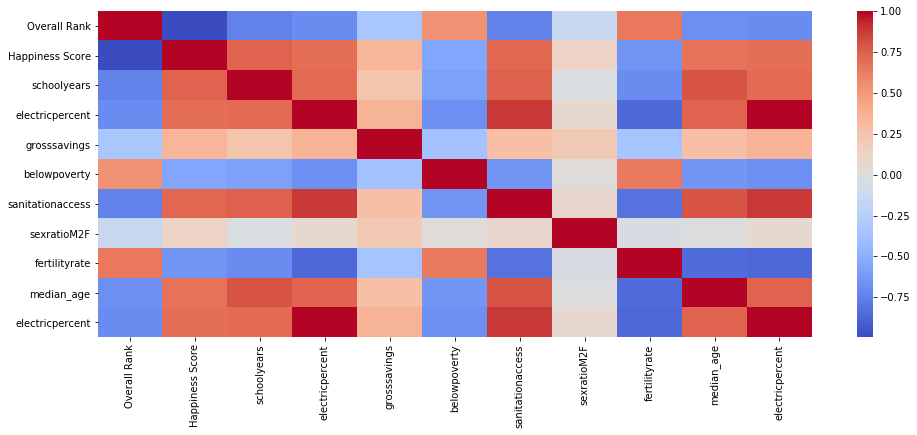

In [102]:
heat= newdf.corr();
plt.figure(figsize=(16, 6))
sns.heatmap(heat, cmap='coolwarm')

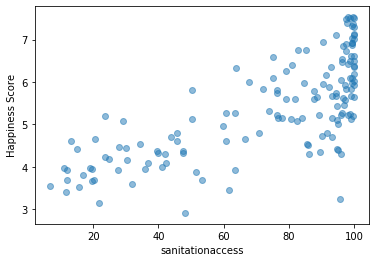

In [103]:
y= newdf['Happiness Score']
x_corruption= newdf['sanitationaccess']
plt.scatter(x_corruption,y, alpha= 0.5, label= 'country')
plt.xlabel("sanitationaccess")
plt.ylabel("Happiness Score")
plt.show()

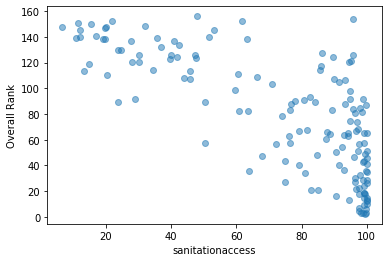

In [104]:
y= newdf['Happiness Score']
x_corruption= newdf['sanitationaccess']
plt.scatter(x_corruption,y, alpha= 0.5, label= 'country')
plt.xlabel("sanitationaccess")
plt.ylabel('Happiness Score')
plt.show()

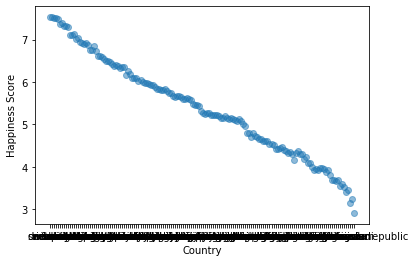

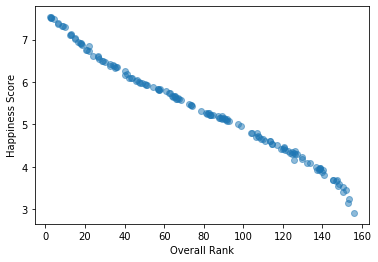

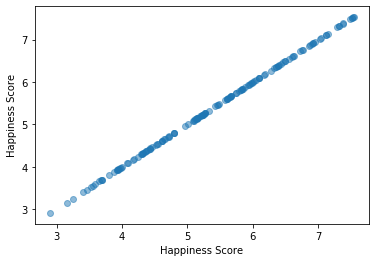

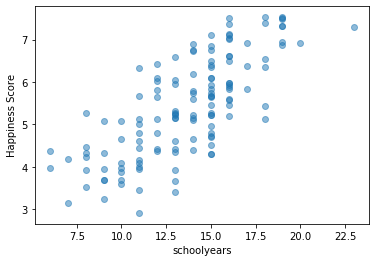

ValueError: x and y must be the same size

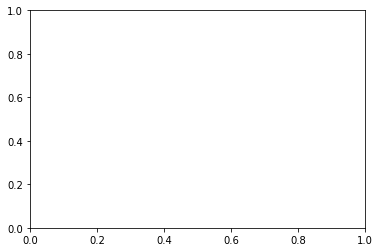

In [110]:
for columns in newdf.columns:
    y= newdf['Happiness Score']
    x_corruption= newdf[f'{columns}']
    plt.scatter(x_corruption,y, alpha= 0.5, label= 'country')
    plt.xlabel(f'{columns}')
    plt.ylabel("Happiness Score")
    plt.show()

In [111]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 35 to 22
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           152 non-null    object 
 1   Overall Rank      152 non-null    float64
 2   Happiness Score   152 non-null    float64
 3   schoolyears       133 non-null    float64
 4   electricpercent   151 non-null    float64
 5   grosssavings      150 non-null    float64
 6   belowpoverty      136 non-null    float64
 7   sanitationaccess  148 non-null    float64
 8   sexratioM2F       152 non-null    float64
 9   fertilityrate     150 non-null    float64
 10  median_age        152 non-null    float64
 11  electricpercent   151 non-null    float64
dtypes: float64(11), object(1)
memory usage: 15.4+ KB
